In [11]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.coordinates import solar_system_ephemeris
from astropy.coordinates import get_body_barycentric_posvel,get_body
from astropy.time import Time
import astropy.units as u
from astropy import constants as const

solar_system_ephemeris.set('jpl')

<ScienceState solar_system_ephemeris: 'jpl'>

In [24]:
t = Time('2016-03-20T12:30:00')
bodies = ['sun', 'earth', 'moon', 'mercury', 'venus', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune','pluto']
body_masses = {

    "sun": const.M_sun.to(u.kg),
    "earth": const.M_earth.to(u.kg),
    "moon": 7.34767309e22 * u.kg,
    "mercury": 3.285e23 * u.kg,
    "venus": 4.867e24 * u.kg,
    "mars": 6.39e23 * u.kg,
    "jupiter": 1.89813e27 * u.kg,
    "saturn": 5.683e26 * u.kg,
    "uranus": 8.681e25 * u.kg,
    "neptune": 1.024e26 * u.kg,
    "pluto": 1.309e22 * u.kg

}
positions = []
velocities = []
masses = []
for body in bodies:
    pos,vel = get_body_barycentric_posvel(body,t,ephemeris='jpl')
    positions.append(np.array(pos.xyz.to(u.meter)))
    velocities.append(np.array(vel.xyz.to(u.meter/u.second)))
    masses.append(float(body_masses[body] / u.kg))
positions = np.array(positions)
velocities = np.array(velocities)
masses = np.array(masses)

masses = pd.DataFrame(np.reshape(masses,(1,)+masses.shape).T,columns=["mass"])
positions = pd.DataFrame(positions,columns=["x","y","z"])
velocities = pd.DataFrame(velocities,columns=["vx","vy","vz"])
df = pd.concat((positions,velocities,masses),axis=1)
df

,x,y,z,vx,vy,vz,mass
0,5.642246e+08,2.781458e+08,9.407599e+07,0.018389,11.092358,4.792032,1.988410e+30
1,-1.484346e+11,1.355607e+07,-1.965354e+07,-421.482144,-27413.042075,-11884.914574,5.972168e+24
2,-1.487688e+11,2.176380e+08,5.218678e+07,-987.741657,-28186.308262,-12131.099412,7.347673e+22
3,5.444324e+10,-7.821993e+09,-9.818344e+09,622.847576,44146.705784,23516.939218,3.285000e+23
4,7.250846e+10,-7.252117e+10,-3.721322e+10,26044.195683,21611.603404,8075.814049,4.867000e+24
5,-2.058646e+11,-1.113006e+11,-4.551185e+10,13121.147568,-17001.324802,-8152.604905,6.390000e+23
6,-7.966131e+11,1.356443e+11,7.752308e+10,-2651.917230,-11244.573199,-4755.149491,1.898130e+27
7,-4.966052e+11,-1.314235e+12,-5.214667e+11,8584.164987,-2851.601828,-1547.439115,5.683000e+26
8,2.807196e+12,9.510718e+11,3.768404e+11,-2380.446237,5558.239342,2468.027672,8.681000e+25
9,4.194984e+12,-1.421283e+12,-6.861793e+11,1876.360294,4756.611143,1900.192833,1.024000e+26


In [40]:
out,stats = PyCC.evaluate(df=df,save=False,dt=10000,steps=10000)

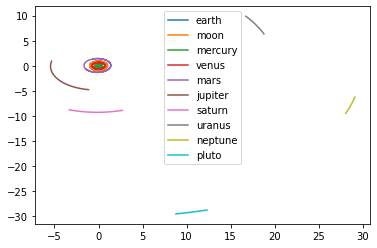

In [41]:
fig = plt.figure()
ax = plt.axes()
au = 1.496e11
pos = {}
for idx,name in enumerate(bodies):
    pos[name] = out[out["id"] == idx].loc[:,["x","y","z"]].to_numpy() / au
ax.scatter(pos["sun"][:,0],pos["sun"][:,1],pos["sun"][:,2])
for name in bodies[1:]:
    ax.plot(pos[name][:,0],pos[name][:,1],pos[name][:,2],label=name)
plt.legend()
plt.show()